### Elliptical Orbits
**When**: These occur when the total mechanical energy of the system is negative (\(E < 0\)).

**Characteristics**: Elliptical orbits are closed paths where the central mass is located at one of the two foci of the ellipse. All planets in the solar system, for instance, follow elliptical orbits around the Sun, with varying degrees of eccentricity. A perfectly circular orbit is a special case of an ellipse with zero eccentricity (\(e = 0\)).

**Physical Significance**: Elliptical orbits signify bound systems where the orbiting body is gravitationally bound to the central mass and will continue to orbit it indefinitely unless perturbed.

### Parabolic Orbits
**When**: These occur at the critical case when the total mechanical energy of the system is exactly zero (\(E = 0\)).

**Characteristics**: Parabolic orbits are open paths that an object follows when it is just escaping the gravitational pull of the central mass, or conversely, just being captured by it. The velocity at any point in a parabolic orbit is the escape velocity at that point.

**Physical Significance**: An object on a parabolic trajectory has just enough energy to escape to infinity but will do so asymptotically, never returning to the central mass.

### Hyperbolic Orbits
**When**: These occur when the total mechanical energy of the system is positive (\(E > 0\)).

**Characteristics**: Hyperbolic orbits are also open paths and represent scenarios where an object passes by the central mass only once and then escapes, never to return. The eccentricity of a hyperbolic orbit is greater than one (\(e > 1\)).

**Physical Significance**: Objects in hyperbolic orbits are not bound to the central mass. These orbits can represent, for example, interstellar objects passing through a solar system.

### Summary
The type of orbit (elliptical, parabolic, or hyperbolic) depends on the total energy of the system:

- **Elliptical Orbit**: Bound, closed orbit (\(E < 0\)), indicating the object will perpetually orbit the central mass unless disturbed.
- **Parabolic Orbit**: The critical case of escape (\(E = 0\)), where the object has just enough energy to escape the gravitational influence of the central mass.
- **Hyperbolic Orbit**: Unbound, open orbit (\(E > 0\)), where the object passes by the central mass once and then escapes, not bound by gravity.


# Elliptic motion : Gravitational central force
The equation is:

$$
\frac{d^2r}{dt^2} - r \left( \frac{d\theta}{dt} \right)^2 = -\frac{GM}{r^2}
$$

This equation combines the radial acceleration $\frac{d^2r}{dt^2}$ and the centripetal acceleration $r \left( \frac{d\theta}{dt} \right)^2$, which is due to the angular motion of the body. Here's a brief outline of how it's derived:

1. **Newton's Second Law**: $F = ma$, where $F$ is the force, $m$ is the mass, and $a$ is the acceleration.
2. **Gravitational Force**: According to Newton's law of universal gravitation, the force of gravity between two masses $m$ and $M$ separated by a distance $r$ is $F = -\frac{GMm}{r^2}$.
3. **Radial and Transverse Components**: In polar coordinates, the acceleration of a body can be decomposed into radial and transverse (angular) components. The radial acceleration is $\frac{d^2r}{dt^2}$, and the transverse acceleration is $r \left( \frac{d\theta}{dt} \right)^2$, which comes from the derivative of the angular momentum $L = mr^2 \frac{d\theta}{dt}$ with respect to time, assuming $L$ is conserved.

The centripetal force needed for circular motion is provided by the gravitational force. By setting the net force equal to the mass times the radial component of the acceleration, we get:

$$
m \frac{d^2r}{dt^2} = m r \left( \frac{d\theta}{dt} \right)^2 = -\frac{GMm}{r^2}
$$

When we divide through by $m$, we arrive at the equation:

$$
\frac{d^2r}{dt^2} - r \left( \frac{d\theta}{dt} \right)^2 = -\frac{GM}{r^2}
$$

This equation tells us that the effective force acting on the body is a result of the gravitational force (the right-hand side) and the fictitious centrifugal force due to the angular motion (the left-hand side).

### Closed Form Solution

By manipulating the conservation of energy equation and using the fact that $\frac{d\theta}{dt} = \frac{L}{m r^2}$, we can find a differential equation for $r$ as a function of $\theta$. Solving this differential equation gives us the orbit equation in polar coordinates, known as the orbit equation:

$$
r(\theta) = \frac{\frac{L^2}{m^2 G M}}{1 + e \cos(\theta)}
$$

where $e$ is the eccentricity of the orbit, which determines the shape of the orbit. For an ellipse, $0 \leq e < 1$. The quantity $\frac{L^2}{m^2 G M}$ is related to the semi-major axis $a$ of the ellipse:

$$
\frac{L^2}{m^2 G M} = a(1 - e^2)
$$

Thus, the closed form of the orbit equation is:

$$
r(\theta) = \frac{a(1 - e^2)}{1 + e \cos(\theta)}
$$

This equation describes the shape of the elliptical orbit, with the central mass located at one focus of the ellipse. The semi-major axis $a$ and the eccentricity $e$ are constants for a given orbit and are determined by the initial conditions of the orbiting body.

By using these conservation laws and the orbit equation, we can fully describe the motion of the body in the elliptical orbit in terms of known quantities and constants of motion.





value of L 2.59089248e+40
value of eccentricity 0.052264644161919754
value of a 142169558608.6609


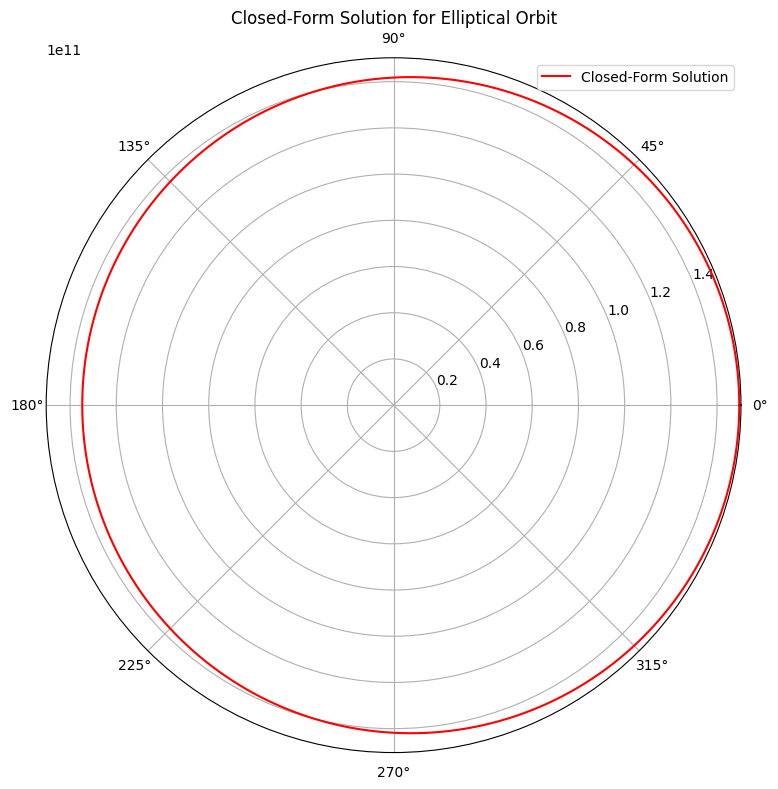

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M = 1.989e30     # mass of the Sun (kg)
m = 5.972e24     # mass of the Earth (kg)
mu = G * M       # Standard gravitational parameter (m^3 s^-2)


# Initial conditions
r0 = 1.496e11  # initial distance from Sun (m)
v0 = 29e3      # initial velocity (m/s), chosen to be less than the escape velocity


# Calculate specific mechanical energy E (per unit mass)
E = 0.5 * v0**2 - mu / r0

# Check if the energy is negative, for an elliptical orbit
if E >= 0:
    raise ValueError("The specific mechanical energy is not negative; the orbit is not elliptical.")

# Calculate angular momentum L
L = m * r0 * v0
print("value of L", L)

# Calculate semi-major axis a and eccentricity e
a = -mu / (2 * E)
e = np.sqrt(1 + (2 * E * L**2) / (mu**2 * m**2))
print("value of eccentricity", e)
print("value of a", a)

#Numerical estimation
# Time span for the integration: one year in seconds
t_span = (0, 365 * 24 * 3600)
t_eval = np.linspace(0, t_span[1], 100000)


# Check if the eccentricity is within the range for an ellipse
if not (0 < e < 1):
    raise ValueError("The eccentricity is not in the range for an elliptical orbit.")

# Define the function to calculate r from theta using the calculated eccentricity and semi-major axis
def r_from_theta(theta, a, e):
    return a * (1 - e**2) / (1 + e * np.cos(theta + np.pi))

# Generate theta values
theta_values = np.linspace(0, 2 * np.pi, 500)

# Calculate r values from the corresponding theta values using the closed-form solution
r_values = r_from_theta(theta_values, a, e)

# Plot the elliptical orbit
plt.figure(figsize=(8, 8))


plt.polar(theta_values, r_values, label='Closed-Form Solution', color='red')
plt.title('Closed-Form Solution for Elliptical Orbit')
plt.legend()


plt.tight_layout()
plt.show()


100000
value of L 4338400000000000.0
0.05226464416192188 value of eccentricity
142169558608.6609 value of a


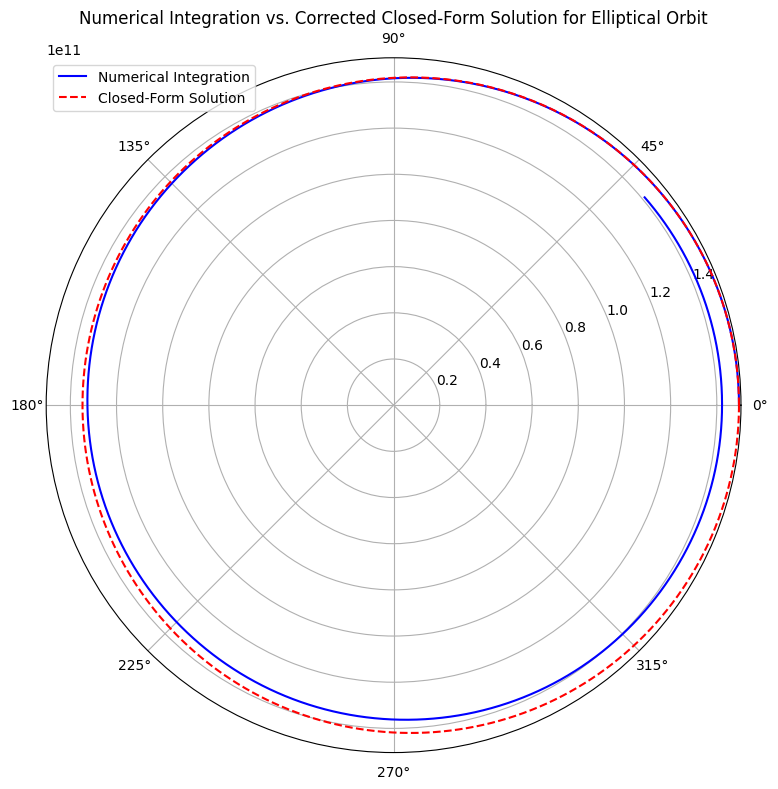

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M = 1.989e30     # mass of the Sun (kg)
mu = G * M       # Standard gravitational parameter (m^3 s^-2)

# Initial conditions
r0 = 1.496e11  # initial distance from Sun (m)
v0 = 29e3      # initial velocity (m/s), chosen to be less than the escape velocity

# Convert to Cartesian coordinates (assuming initial position is (r0, 0) and initial velocity is purely tangential)
x0 = r0
y0 = 0
vx0 = 0
vy0 = v0

# Initial state vector
initial_state = [x0, y0, vx0, vy0]

# Define the equations of motion
def equations_of_motion(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -mu * x / r**3
    ay = -mu * y / r**3
    return [vx, vy, ax, ay]

# Time span for the integration: one year in seconds
t_span = (0, 365 * 24 * 3600)
t_eval = np.linspace(*t_span, 100000)

# Solve the system of differential equations
solution = solve_ivp(equations_of_motion, t_span, initial_state, t_eval=t_eval, method='RK45')
print(len(solution.t))
# Extract the solution
x, y, vx, vy = solution.y

# Convert to polar coordinates for plotting
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Plotting setup
plt.figure(figsize=(8, 8))

# Numerical integration solution
plt.polar(theta, r, label='Numerical Integration', color='blue')

# Generate theta values for plotting the closed-form solution
theta_values = np.linspace(0, 2 * np.pi, 500)



# Calculate corrected semi-major axis and eccentricity
E = 0.5 * v0**2 - mu / r0
L =  r0 * v0  # Angular momentum
print("value of L", L)
a_corrected = -mu / (2 * E)  # semi-major axis, corrected
e_corrected = np.sqrt(1 + (2 * E * L**2) / (mu**2))  # eccentricity, corrected




#e_corrected = 0.03 # eccentricity, corrected
print(e_corrected, "value of eccentricity")
print(a_corrected, "value of a")

# Function for calculating r from theta for the corrected calculation
def r_from_theta_corrected(theta, a, e):
    return a * (1 - e**2) / (1 + e * np.cos(theta + np.pi))

# Calculate r values using the corrected function
r_values_corrected = r_from_theta_corrected(theta_values, a_corrected, e_corrected)

# Corrected closed-form solution
plt.polar(theta_values, r_values_corrected, label='Closed-Form Solution', color='red', linestyle='dashed')

# Final plot adjustments
plt.title('Numerical Integration vs. Corrected Closed-Form Solution for Elliptical Orbit')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
# Velocity Verlet integration method
def velocity_verlet_integrator(eom, state0, t_span, dt):
    times = np.arange(t_span[0], t_span[1], dt)
    states = np.zeros((len(times), 4))
    states[0] = state0

    x, y, vx, vy = state0
    ax, ay = eom(0, state0)[2:]

    for i in range(1, len(times)):
        x += vx * dt + 0.5 * ax * dt**2
        y += vy * dt + 0.5 * ay * dt**2

        new_ax, new_ay = eom(times[i], [x, y, vx, vy])[2:]
        vx += 0.5 * (ax + new_ax) * dt
        vy += 0.5 * (ay + new_ay) * dt

        states[i] = [x, y, vx, vy]
        ax, ay = new_ax, new_ay

    return times, states
def equations_of_motion_with_mu(t, y):
    mu = G * M  # You could also directly use the already defined 'mu'
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -mu * x / r**3
    ay = -mu * y / r**3
    return [vx, vy, ax, ay]

100000


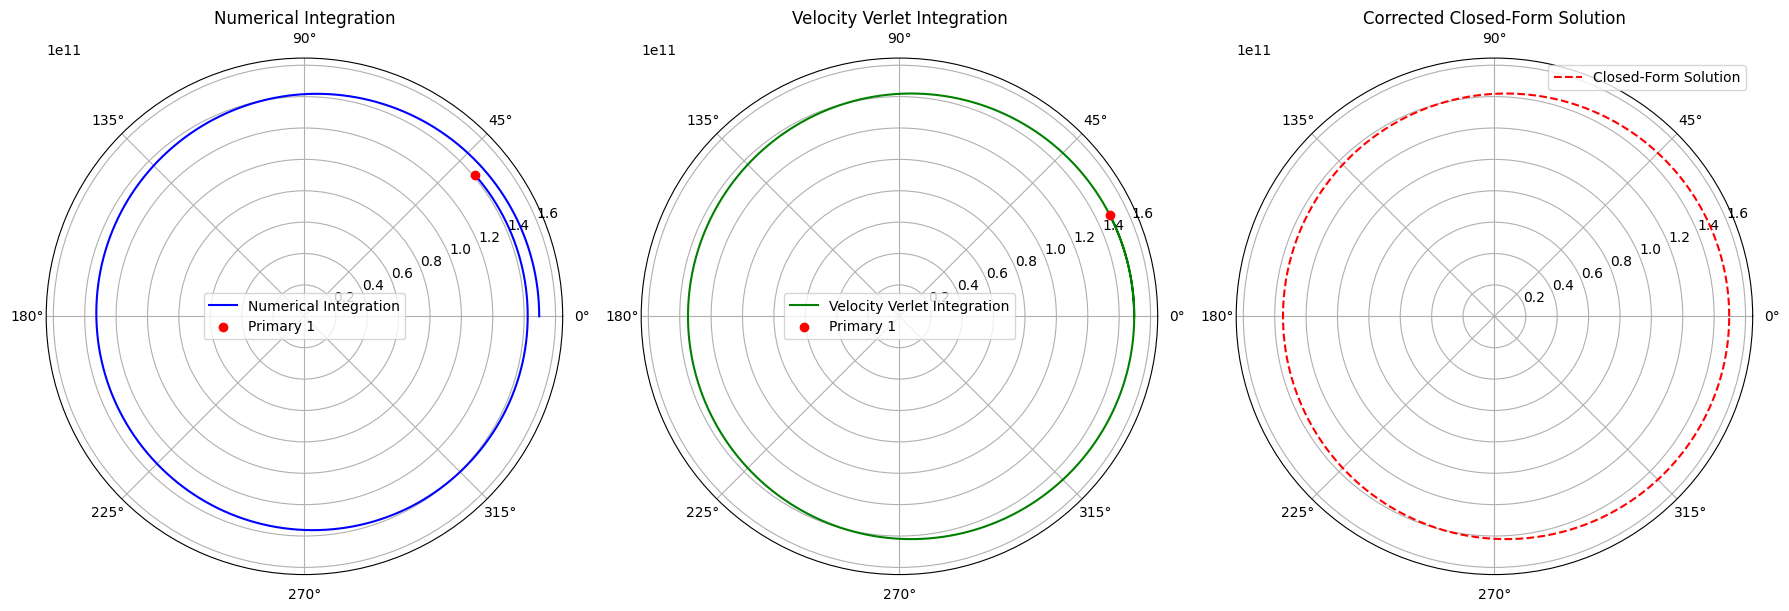

In [52]:
# Time span, time step, and initial state (same as before)
dt = 365 * 24 * 3600 / 100000  # Example time step
times, states_verlet = velocity_verlet_integrator(equations_of_motion_with_mu, initial_state, t_span, dt)

# Extract the solutions
x, y, vx, vy = solution.y
x_verlet, y_verlet, vx_verlet, vy_verlet = states_verlet.T

# Convert to polar coordinates for plotting
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
r_verlet = np.sqrt(x_verlet**2 + y_verlet**2)
theta_verlet = np.arctan2(y_verlet, x_verlet)

# Plotting setup with subplots
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(18, 6))

print(len(theta))

# Numerical integration solution
axs[0].plot(theta, r, label='Numerical Integration', color='blue')
axs[0].scatter(theta[-1],r[-1], color='red', zorder=5, label='Primary 1')  # Primary 1
axs[0].set_title('Numerical Integration')

# Velocity Verlet integration solution
axs[1].plot(theta_verlet, r_verlet, label='Velocity Verlet Integration', color='green')
axs[1].scatter(theta_verlet[-1],r_verlet[-1], color='red', zorder=5, label='Primary 1')  # Primary 1
axs[1].scatter(theta_verlet[-1],r_verlet[-1], color='red', zorder=5, label='Primary 1')  # Primary 1
axs[1].set_title('Velocity Verlet Integration')

# Closed-Form Solution (same calculation as before)

# Corrected closed-form solution
axs[2].plot(theta_values, r_values_corrected, label='Closed-Form Solution', color='red', linestyle='dashed')
axs[2].set_title('Corrected Closed-Form Solution')

# Final plot adjustments
for ax in axs:
    ax.legend()
    ax.set_ylim(0, max(np.max(r), np.max(r_verlet), np.max(r_values_corrected)) * 1.1)  # Adjust ylim to fit all data

plt.tight_layout()
plt.show()

# Overlay the closed solution of the blue (the blue on top of the red)
# calculate the maximun frog

-> how check smaller number of steps for longer timesteps
-> step size for the harmonic problem
step size paper:
https://www.sciencedirect.com/science/article/pii/S0377042715002095#f000005

keeping the step size the same, extending the span of the time (both problems)

-> choose a best integrator